### Data Analysis & Visualization

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dfv = pd.read_csv('twitter_archive_master.csv')

In [3]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 25 columns):
Unnamed: 0               1477 non-null int64
tweet_id                 1477 non-null int64
in_reply_to_status_id    14 non-null float64
in_reply_to_user_id      14 non-null float64
timestamp                1477 non-null object
source                   1477 non-null object
text                     1477 non-null object
expanded_urls            1477 non-null object
rating_numerator         1477 non-null int64
rating_denominator       1477 non-null int64
name                     1477 non-null object
dog_stage                228 non-null object
retweet_count            1477 non-null int64
favorite_count           1477 non-null int64
jpg_url                  1477 non-null object
img_num                  1477 non-null float64
probability1             1477 non-null object
p1_conf                  1477 non-null float64
p1_dog                   1477 non-null bool
probability2             147

In [4]:
df_breed = dfv.probability1

## Insight 1 : Most Tweeted Breeds

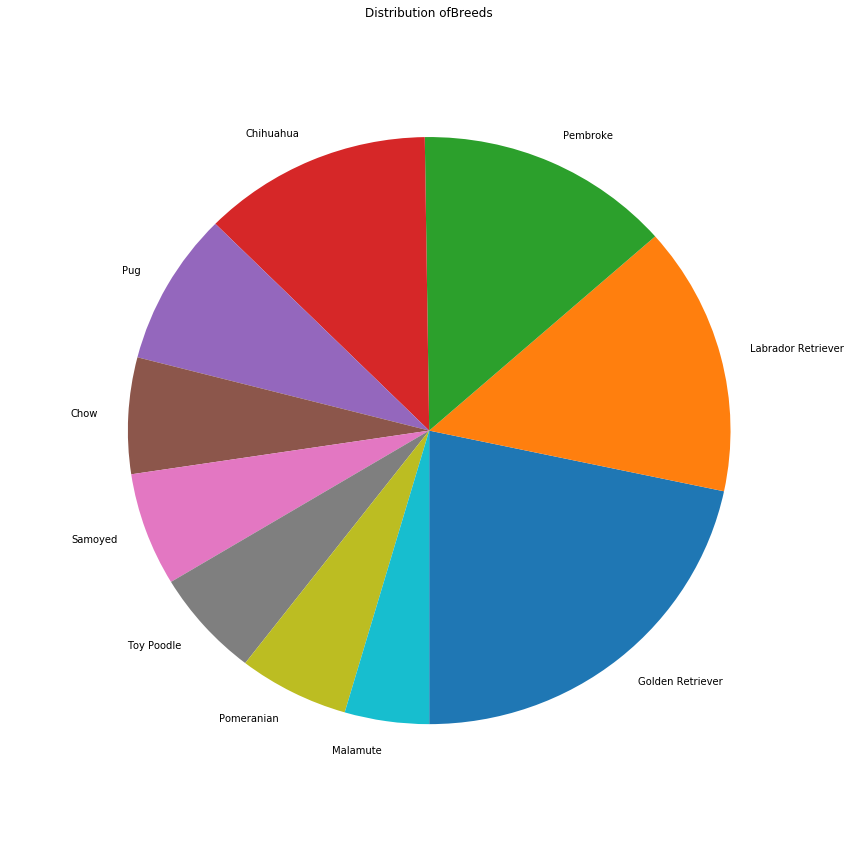

In [5]:
plt.rcParams['figure.figsize']=(15,15)
df_breed.value_counts(sort=True)[:10].plot.pie(startangle=270, pctdistance=0.8, radius = 0.9)
plt.title('Distribution of Breeds')
plt.ylabel('')
plt.show();

We noticed that the most 10 dog types that has been tweeted are: Golden Retrieve  , Labrador Retriever, Pembroke , Chihuahua, Pug, Chow, Samoyed, Pomeranian, Toy Poodle, Malamute.

In [6]:
df_breed.head()

0                   Chihuahua
1                   Chihuahua
2                      Basset
3    Chesapeake Bay Retriever
4                 Appenzeller
Name: probability1, dtype: object

In [7]:
fav_breed = df_breed.value_counts()
breed_sort = fav_breed.sort_values(ascending = False)
top10_breeds = breed_sort.head(10)
top10_breeds

Golden Retriever      139
Labrador Retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Toy Poodle             38
Pomeranian             38
Malamute               29
Name: probability1, dtype: int64

### Insight 2  Dog stages


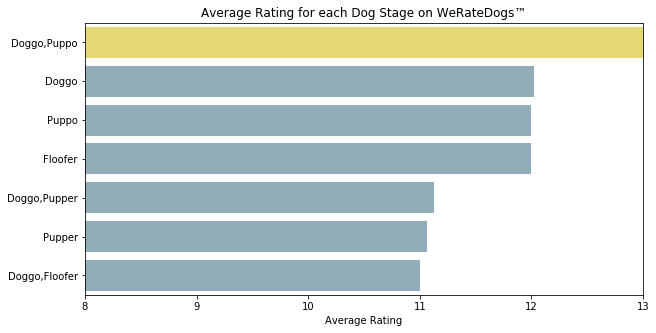

In [14]:
# define axis values
x_axis = list(stage_groups)
y_axis = [i.title() for i in stage_groups.index]

# plot the bar chart
plt.figure(figsize=[10,5])
plt.xlim(8,13)
plt.xlabel('Average Rating')
plt.title('Average Rating for each Dog Stage on WeRateDogs™')
colors = ['#8dafbe' if (x < max(x_axis)) else '#f8e863' for x in x_axis]
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b", palette=colors)
plt.show();

In [12]:
stage_groups = dfv.groupby('dog_stage')['rating_numerator'].mean()

In [23]:
dfv.groupby('dog_stage')['timestamp'].describe()

,count,unique,top,freq
dog_stage,,,,
doggo,48,48,2016-11-09 22:49:15,1
"doggo,floofer",1,1,2017-04-17 16:34:26,1
"doggo,pupper",8,8,2016-07-09 01:08:47,1
"doggo,puppo",1,1,2017-04-22 18:31:02,1
floofer,7,7,2016-05-21 00:50:46,1
pupper,144,144,2016-09-03 22:02:38,1
puppo,19,19,2016-06-16 01:25:36,1


In [13]:
# sorts the stage groups by descending order
stage_groups = stage_groups.sort_values(ascending=False)
stage_groups

dog_stage
doggo,puppo      13.000000
doggo            12.020833
puppo            12.000000
floofer          12.000000
doggo,pupper     11.125000
pupper           11.062500
doggo,floofer    11.000000
Name: rating_numerator, dtype: float64

In [11]:
dfv.groupby('dog_stage')['timestamp'].describe()

,count,unique,top,freq
dog_stage,,,,
doggo,48,48,2016-11-09 22:49:15,1
"doggo,floofer",1,1,2017-04-17 16:34:26,1
"doggo,pupper",8,8,2016-07-09 01:08:47,1
"doggo,puppo",1,1,2017-04-22 18:31:02,1
floofer,7,7,2016-05-21 00:50:46,1
pupper,144,144,2016-09-03 22:02:38,1
puppo,19,19,2016-06-16 01:25:36,1


In [8]:
dfv.groupby('dog_stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,48.0,12.020833,1.391304,8.0,11.00,12.0,13.0,14.0
"doggo,floofer",1.0,11.000000,NaN,11.0,11.00,11.0,11.0,11.0
"doggo,pupper",8.0,11.125000,2.531939,5.0,11.75,12.0,12.0,13.0
"doggo,puppo",1.0,13.000000,NaN,13.0,13.00,13.0,13.0,13.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
pupper,144.0,11.062500,1.922334,7.0,10.00,11.0,12.0,27.0
puppo,19.0,12.000000,1.374369,9.0,11.50,12.0,13.0,14.0


Accross whole data frame the most common stage of the dog is pupper than doggo also we see that this variabel has poor qulaity and wasn't clened up very well. Also the top avreage rating across the tweetsgets the Doggo, Puppo.

### Insight 3  The most common dog name 

In [9]:
df_name = dfv.name

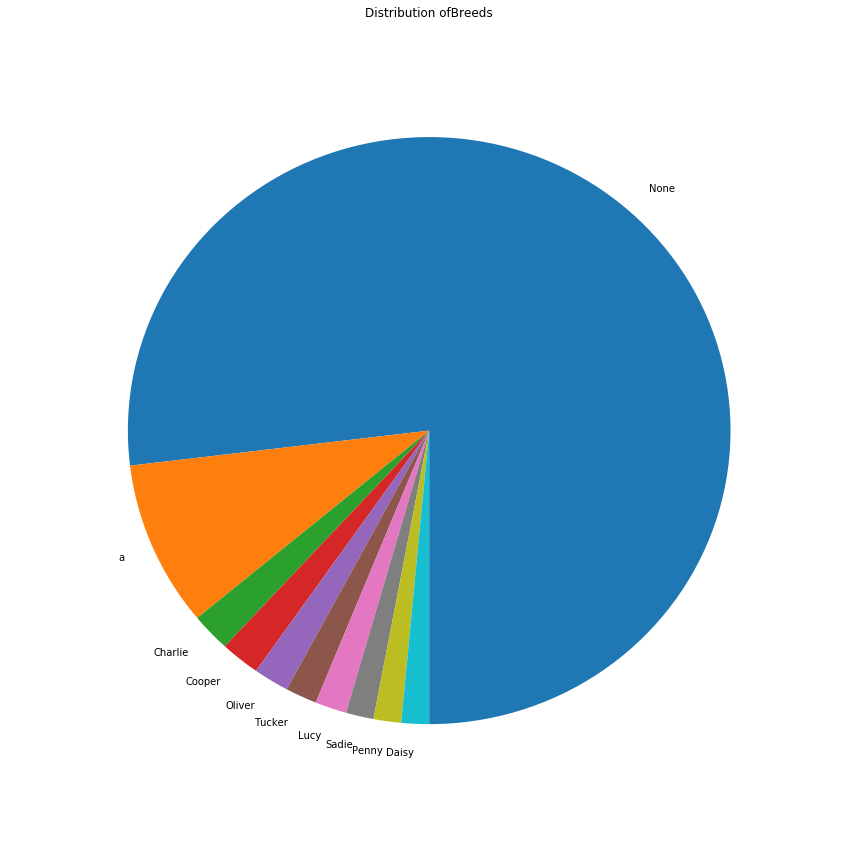

In [10]:
plt.rcParams['figure.figsize']=(15,15)
df_name.value_counts(sort=True)[:10].plot.pie(startangle=270, pctdistance=0.8, radius = 0.9)
plt.title('Distribution ofBreeds')
plt.ylabel('')
plt.show();

Looking at most common dog name we see that majority of data is missing but still will able to get the Top 8 dogs name whichis Charlie ; Cooper ; Oliver; Tucker; Lucy; Sadie; Penny; Daisy.

### Insight 3 The most common tweet rate 


In [24]:
dfv['rating_numerator'].value_counts()

12     380
10     318
11     307
13     214
9      108
8       58
7       24
14      21
6       12
5       10
4        5
3        3
165      1
2        1
24       1
143      1
26       1
27       1
44       1
45       1
50       1
60       1
75       1
80       1
84       1
88       1
99       1
121      1
1        1
Name: rating_numerator, dtype: int64

It seems that the most common rate has been given to dogs is 12/10 and also that 10/10 is the second rate accross the tweets

### Conclusion :

##### We noticed that the most 10 dog breeds are Golden Retriever , Labrador_retriever, Pembroke , Chihuahua, Pug, Chow, Samoyed, Pomeranian, Toy Poodle, Malamute.

##### Dog Stage variable is not the best variable to describe the population as it's still has quality issues 

##### The most common dog name for first four is a male name Charlie ; Cooper ; Oliver; Tucker  and then we have feamle names  Lucy; Sadie; Penny; Daisy.

#### It seems that the most common rate across the tweets that has been given to dogs is 12/10 and the 2nd one is 10/10